In [2]:
#04(04-1) 2번 문제 풀고, 풀이 과정 설명하기	Ch.04(04-2) 과대적합/과소적합 손코딩 코랩 화면 캡처하기
#Q.로지스틱 회귀가 이진 분류에서 확율을 출력하기 위해 사용하는 함수
#A.시그모이드 함수 / 0.5를 기준으로 두가지의 상태(0.5초과, 0.5미만)을 확인하기 위하여


import pandas as pd
fish = pd.read_csv('fish.csv')
print(fish.head())

pd.unique(fish['Species'])

  Species  Weight  Length  Diagonal   Height   Width
0   Bream   242.0    25.4      30.0  11.5200  4.0200
1   Bream   290.0    26.3      31.2  12.4800  4.3056
2   Bream   340.0    26.5      31.1  12.3778  4.6961
3   Bream   363.0    29.0      33.5  12.7300  4.4555
4   Bream   430.0    29.0      34.0  12.4440  5.1340


array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [3]:
fishInput = fish[['Weight', 'Length', 'Diagonal','Height','Width']].to_numpy()
fishInput[:5]

array([[242.    ,  25.4   ,  30.    ,  11.52  ,   4.02  ],
       [290.    ,  26.3   ,  31.2   ,  12.48  ,   4.3056],
       [340.    ,  26.5   ,  31.1   ,  12.3778,   4.6961],
       [363.    ,  29.    ,  33.5   ,  12.73  ,   4.4555],
       [430.    ,  29.    ,  34.    ,  12.444 ,   5.134 ]])

In [4]:
fishTarget=fish['Species'].to_numpy()
fishTarget

array(['Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach',
       'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach',
       'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Whitefish',
       'Whitefish', 'Whitefish', 'Whitefish', 'Whitefish', 'Whitefish',
       'Parkki', 'Parkki', 'Parkki', 'Parkki', 'Parkki', 'Parkki',
       'Parkki', 'Parkki', 'Parkki', 'Parkki', 'Parkki', 'Perch', 'Perch',
       'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch',
       'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch',
       'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch',
       'Perc

In [5]:
from sklearn.model_selection import train_test_split
trainInput, testInput, trainTarget, testTarget = train_test_split(fishInput, fishTarget, random_state=42)

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(trainInput)
trainScaled = ss.transform(trainInput)
testScaled = ss.transform(testInput)

In [6]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(trainScaled, trainTarget)
print(kn.score(trainScaled, trainTarget))
print(kn.score(testScaled, testTarget))

0.8907563025210085
0.85


In [7]:
import numpy as np
proba = kn.predict_proba(testScaled[:5])
np.round(proba, decimals=4)

array([[0.    , 0.    , 1.    , 0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.    , 1.    , 0.    ],
       [0.    , 0.    , 0.    , 1.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.6667, 0.    , 0.3333, 0.    , 0.    ],
       [0.    , 0.    , 0.6667, 0.    , 0.3333, 0.    , 0.    ]])

In [8]:
distances, indexes = kn.kneighbors(testScaled[3:4])
print(trainTarget[indexes])

[['Roach' 'Perch' 'Perch']]


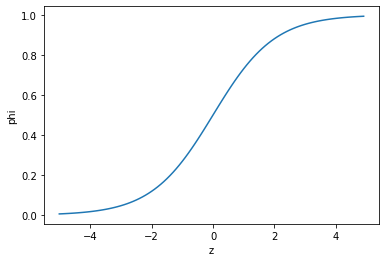

In [12]:
import matplotlib.pyplot as plt
#로지스틱 회귀
z = np.arange(-5, 5, 0.1)
phi = 1 /(1+np.exp(-z))
plt.plot(z,phi)
plt.xlabel('z')
plt.ylabel('phi')
plt.show()


In [13]:
breamSmeltIndexs = (trainTarget=='Bream')|(trainTarget=='Smelt')
trainBreamSmelt = trainScaled[breamSmeltIndexs]
targetBreamSmelt = trainTarget[breamSmeltIndexs]


print(trainBreamSmelt)
print(targetBreamSmelt)

[[ 0.91965782  0.60943175  0.81041221  1.85194896  1.00075672]
 [-1.0858536  -1.68646987 -1.70848587 -1.70159849 -2.0044758 ]
 [ 0.63818253  0.56257661  0.73223951  1.64473401  0.50705737]
 [ 0.30041219  0.23459067  0.42823457  1.36042157  0.22329758]
 [ 0.9027693   0.70314202  0.88858491  1.89027545  0.85537174]
 [-1.0824759  -1.61150165 -1.62162731 -1.7000674  -1.92815631]
 [ 0.10337949  0.04717013  0.23714575  0.88445197  0.41799764]
 [ 1.49668216  1.03112796  1.21864741  2.44274986  1.40289707]
 [ 0.23004337  0.23459067  0.42823457  1.3336029   0.39983213]
 [-0.42579405 -0.29018684 -0.11028847  0.65627104 -0.26107519]
 [ 1.28557569  0.70314202  0.89727076  1.98228866  1.06683526]
 [ 0.93373158  0.60943175  0.83646978  1.85150445  0.97832415]
 [ 0.80706771  0.60943175  0.81041221  1.63137406  1.0255057 ]
 [-1.07262426 -1.52716241 -1.55214047 -1.67235972 -1.86207776]
 [ 1.6374198   1.17169337  1.27076255  2.41341232  1.40143407]
 [-1.07966115 -1.63961473 -1.67374245 -1.6462819  -1.87

In [14]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(trainBreamSmelt, targetBreamSmelt)
lr.predict(trainBreamSmelt)

array(['Bream', 'Smelt', 'Bream', 'Bream', 'Bream', 'Smelt', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Smelt',
       'Bream', 'Smelt', 'Smelt', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Smelt', 'Bream', 'Smelt',
       'Smelt', 'Bream', 'Smelt', 'Bream', 'Bream'], dtype=object)

In [17]:
print(lr.predict_proba(trainBreamSmelt[:5]))

[[0.99759855 0.00240145]
 [0.02735183 0.97264817]
 [0.99486072 0.00513928]
 [0.98584202 0.01415798]
 [0.99767269 0.00232731]]


In [24]:
print(lr.coef_, lr.intercept_)
#z = -0.4037798 * 무게 -0.57620209*길이 -0.66280298 * 대각선 -1.01290277 * 높이 -0.73168947 * 넓이-2.16155132
#뭔소리다냐 :(
decisions = lr.decision_function(trainBreamSmelt[:5])
decisions

[[-0.4037798  -0.57620209 -0.66280298 -1.01290277 -0.73168947]] [-2.16155132]


array([-6.02927744,  3.57123907, -5.26568906, -4.24321775, -6.0607117 ])

In [25]:
from scipy.special import expit
print(expit(decisions))

[0.00240145 0.97264817 0.00513928 0.01415798 0.00232731]


In [28]:
lr = LogisticRegression(C=20, max_iter=1000)
lr.fit(trainScaled, trainTarget)
print(lr.score(trainScaled, trainTarget))
print(lr.score(testScaled, testTarget))

0.9327731092436975
0.925


In [29]:
proba = lr.predict_proba(testScaled[:5])
np.round(proba, decimals=3)

array([[0.   , 0.014, 0.841, 0.   , 0.136, 0.007, 0.003],
       [0.   , 0.003, 0.044, 0.   , 0.007, 0.946, 0.   ],
       [0.   , 0.   , 0.034, 0.935, 0.015, 0.016, 0.   ],
       [0.011, 0.034, 0.306, 0.007, 0.567, 0.   , 0.076],
       [0.   , 0.   , 0.904, 0.002, 0.089, 0.002, 0.001]])

In [31]:
#시그모이드, 소프트 맥스 기억하기 나중에 또 나옴....젠장 

decision = lr.decision_function(testScaled[:5])
np.round(decision, decimals=2)

array([[ -6.5 ,   1.03,   5.16,  -2.73,   3.34,   0.33,  -0.63],
       [-10.86,   1.93,   4.77,  -2.4 ,   2.98,   7.84,  -4.26],
       [ -4.34,  -6.23,   3.17,   6.49,   2.36,   2.42,  -3.87],
       [ -0.68,   0.45,   2.65,  -1.19,   3.26,  -5.75,   1.26],
       [ -6.4 ,  -1.99,   5.82,  -0.11,   3.5 ,  -0.11,  -0.71]])

In [32]:
from scipy.special import softmax

proba = softmax(decision, axis  = 1)
np.round(proba, decimals=3)

array([[0.   , 0.014, 0.841, 0.   , 0.136, 0.007, 0.003],
       [0.   , 0.003, 0.044, 0.   , 0.007, 0.946, 0.   ],
       [0.   , 0.   , 0.034, 0.935, 0.015, 0.016, 0.   ],
       [0.011, 0.034, 0.306, 0.007, 0.567, 0.   , 0.076],
       [0.   , 0.   , 0.904, 0.002, 0.089, 0.002, 0.001]])

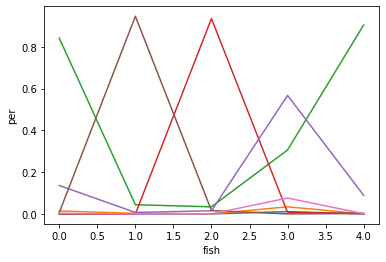

In [47]:
# plt.plot(proba)
plt.plot(np.round(proba, decimals=3))
plt.xlabel('fish')
plt.ylabel('per')
plt.show()
